In [34]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/home/ramo/Scrivania/data.csv', index_col='Counter')

In [5]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2
Counter,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other
...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other


In [35]:
#calcolo campo magnetico
data['mag'] = np.sqrt(data['Mag_x']**2 + data['Mag_y']**2 + data['Mag_z']**2) 

In [36]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,mag
Counter,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,5.200727
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,9.323103
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,12.628853
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,14.890080
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other,16.880225
...,...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other,33.060488
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other,33.005579
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other,32.902529


<AxesSubplot:xlabel='Counter'>

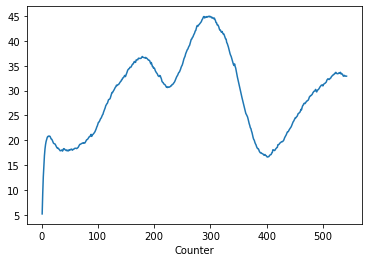

In [39]:
#grafico campo magnetico
data['mag'].plot()

<AxesSubplot:>

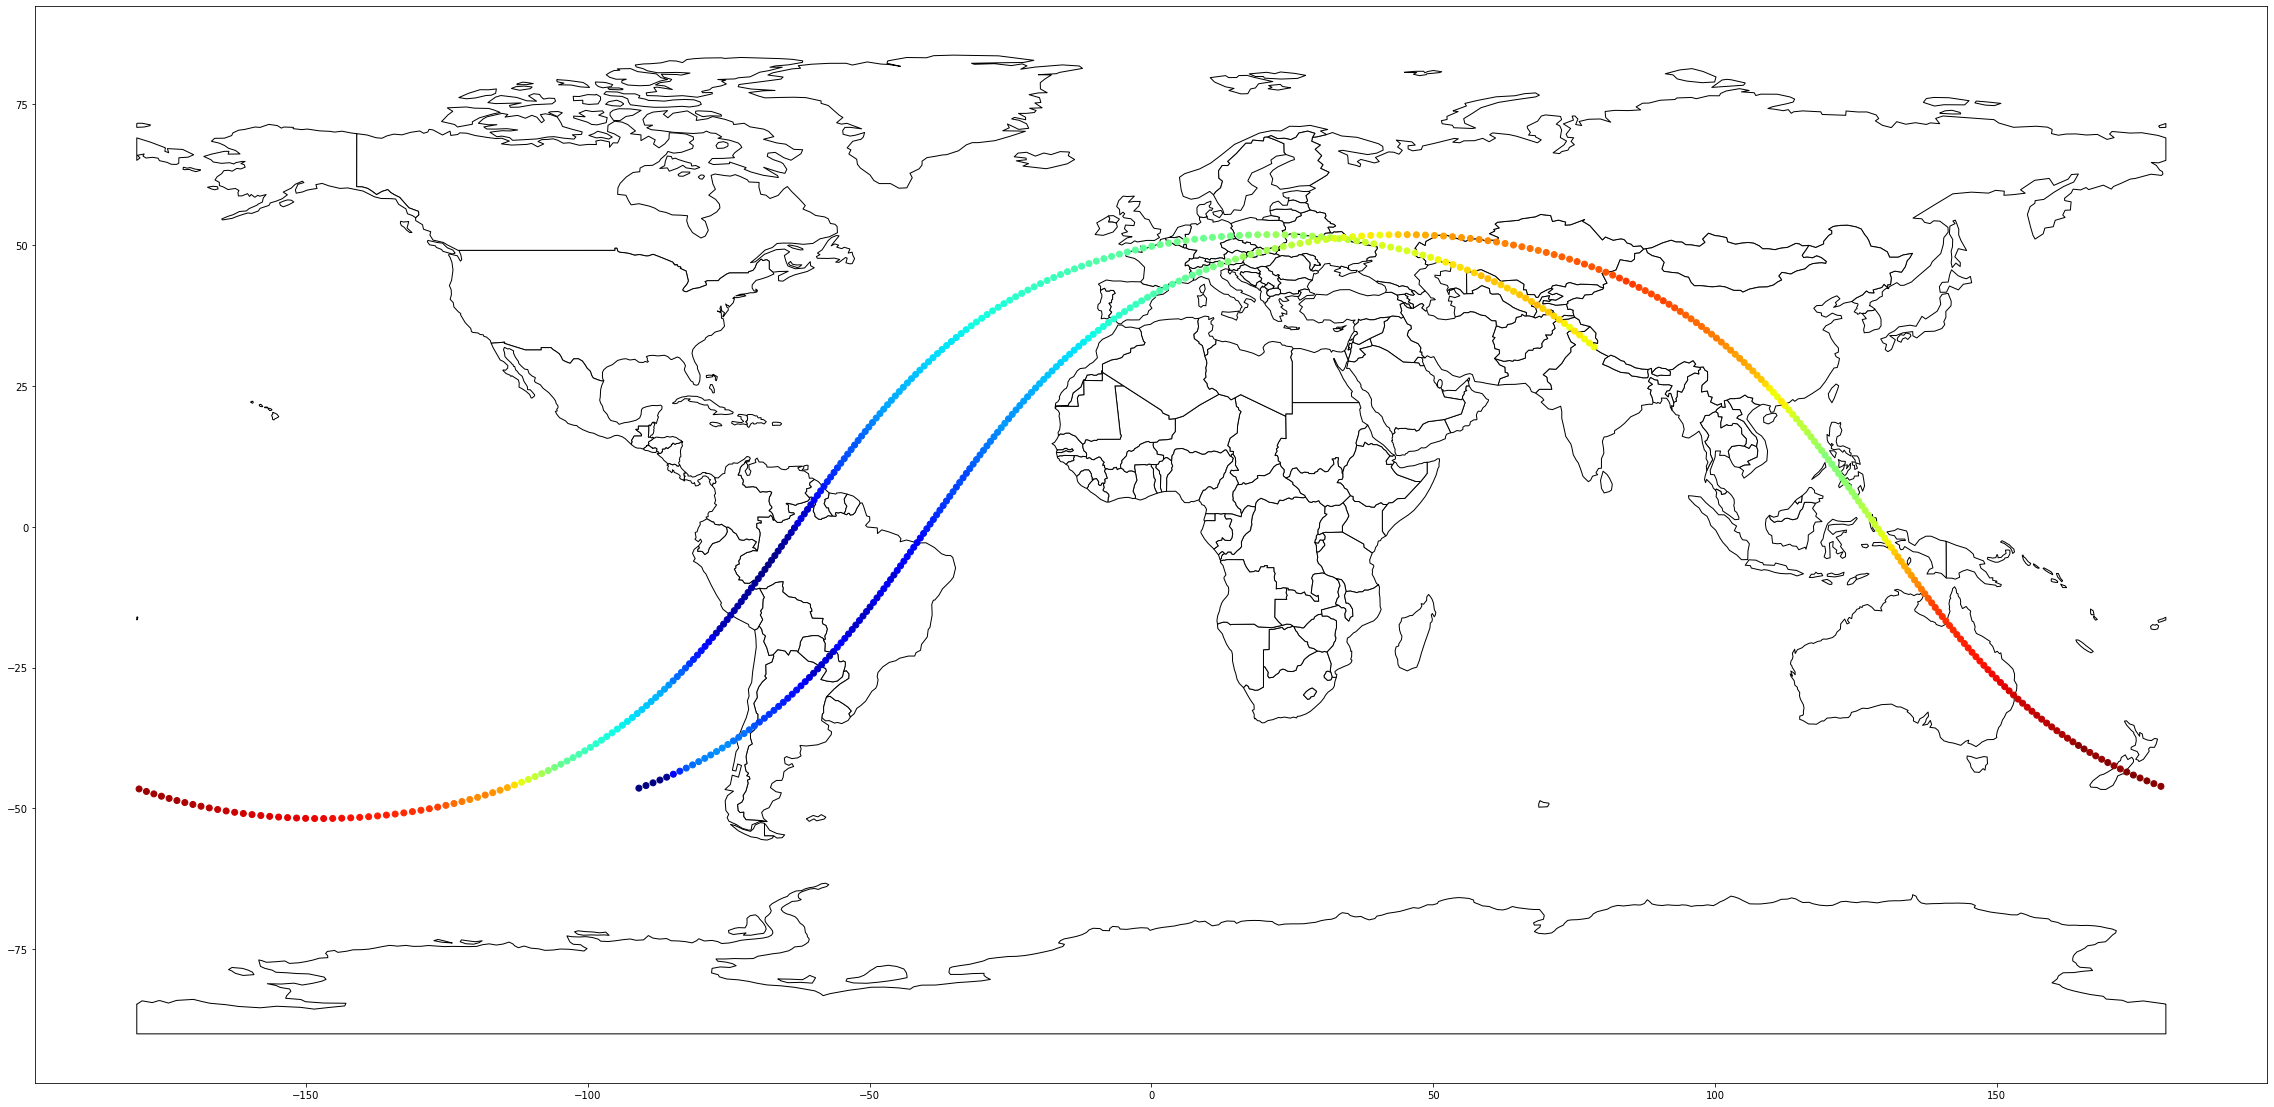

In [40]:
#traiettoria con valori del campo magnetico

data = data.sort_values(by=['mag'])

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = data['mag'], cmap = 'jet')


<AxesSubplot:>

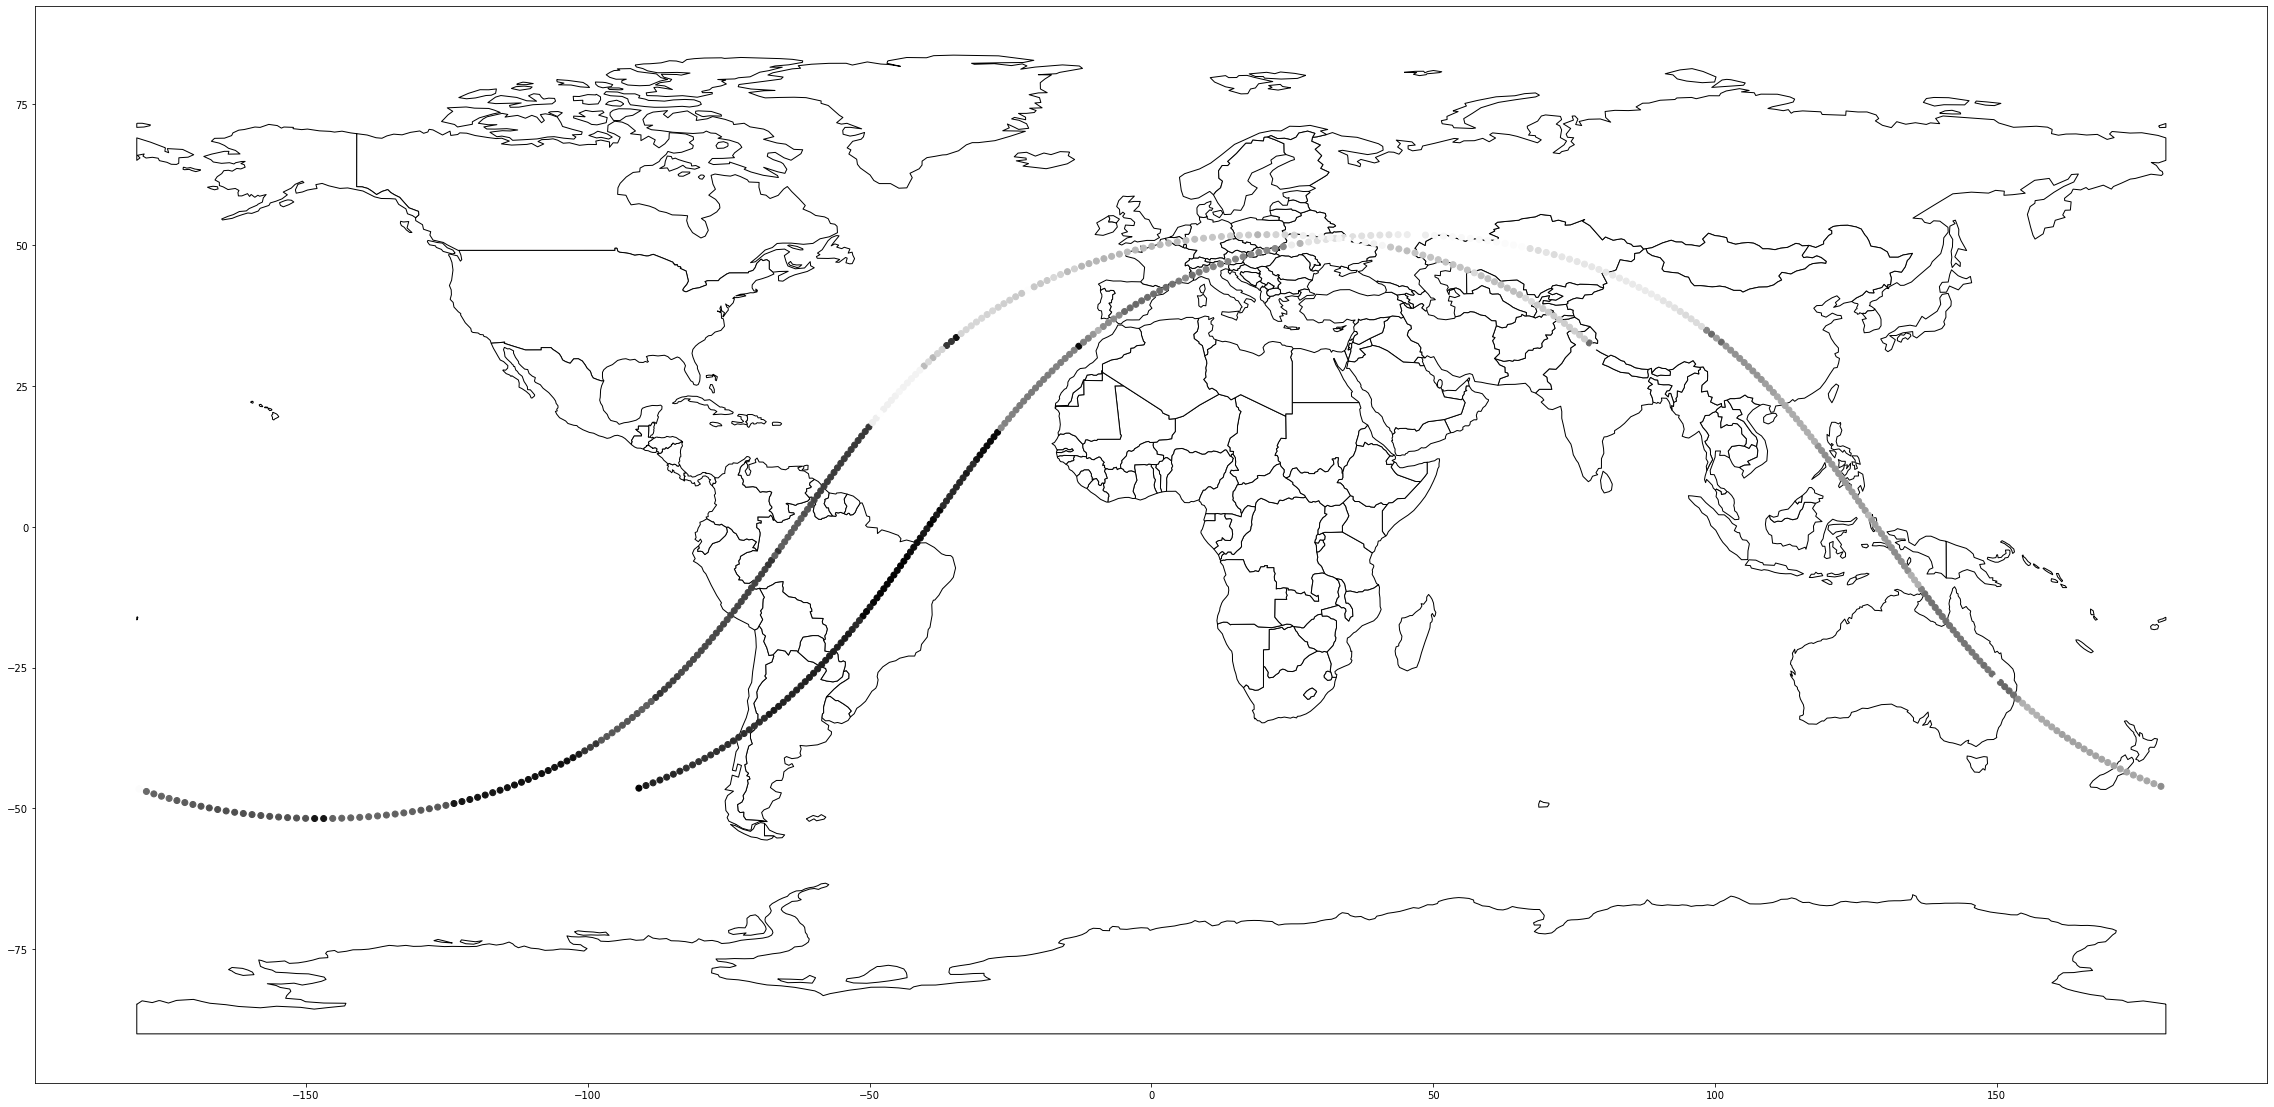

In [61]:
#traiettoria con valori di giorno e notte

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = data['Label1'], cmap = 'gist_gray')

<AxesSubplot:xlabel='Longitude', ylabel='mag'>

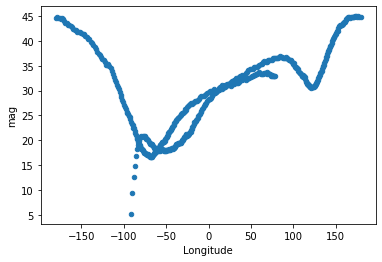

In [47]:
#rapporto longitudine e campo magnetico
data.plot.scatter(x='Longitude', y='mag')

<AxesSubplot:xlabel='Latitude', ylabel='mag'>

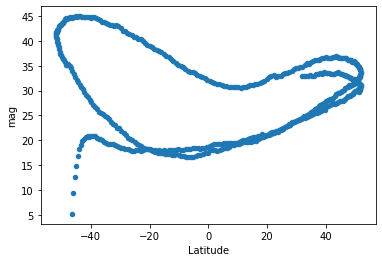

In [48]:
#rapporto latitudine e campo magnetico
data.plot.scatter(x='Latitude', y='mag')